In [2]:
import scipy.io as sio
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import roc_curve, auc

from model_utils import *
from feature_utils import *

In [3]:
patients = np.array([13, 14, 16, 19, 58, 67, 72, 75, 114, 116, 118, 126, 127, \
    133, 142, 144, 146, 153, 157, 188, 191, 192, 193, 195, 198, 204, \
    278, 280, 282, 287, 290, 293, 297, 298, 299, 303, 305, 312, 316, 317, 318, \
    321, 332, 335, 339, 343, 344, 351, 352, 353, 354, 355, 358, 359, 360, 361, \
    362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 375, 376, 377, \
    378, 379, 380, 381, 382, 383, 385, 387, 389, 390, 391, 392, 393, 394, 395, \
    396, 397, 398, 399, 401, 402, 403, 404, 405, 407, 408, 409, 410, 412, 413, \
    414, 415, 416, 417, 418, 419, 422, 423, 424, 425, 427, 428, 429, 430, 431, \
    432, 435, 437, 438, 439, 440, 443, 444, 446, 447, 448, 449, 451, 452, 453])

In [4]:
directory = '/Users/jenniferpolson/Documents/School/PhD/Academic/2018-S/BE 223C/223C/041918_be223c_project'

labelmat = sio.loadmat('%s/021218_TSS_strokeR01.mat' %directory)
tss_label = (labelmat['TSS'][patients-1][:,1] < 270)*1

In [5]:
raw_data = pickle.load(open("img_dict.pkl", "rb" ) )

In [6]:
#generate the clustered features - this is done once then saved to a file for quicker loading
#featArr_clust = generate_features_cluster(patients, raw_data)
#np.save('features_cluster.npy', featArr_clust)
featArr_clust = np.load('features_cluster.npy')

## Cluster method results

{'max_features': 0.1, 'min_samples_leaf': 29}
{'activation': 'logistic', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


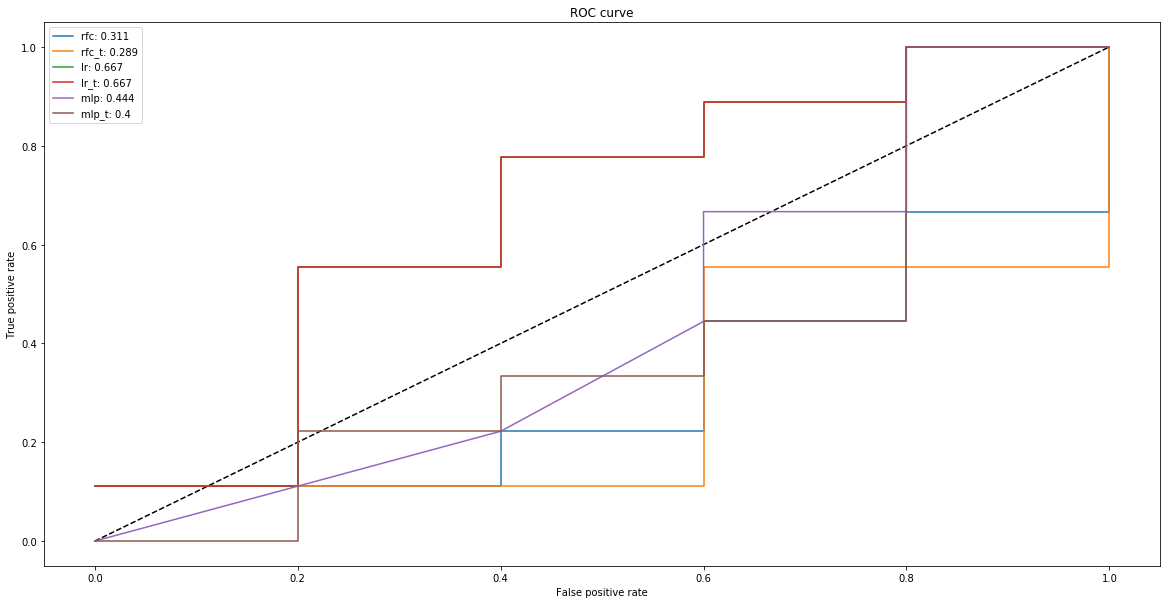

{'max_features': 0.1, 'min_samples_leaf': 27}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


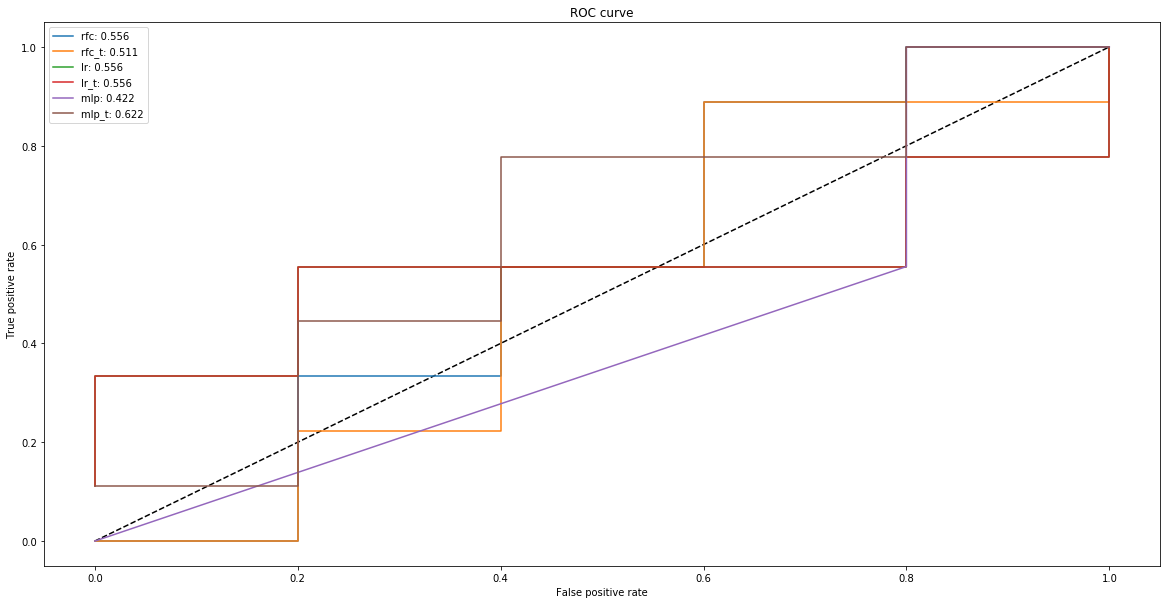

{'max_features': 0.7000000000000001, 'min_samples_leaf': 17}
{'activation': 'tanh', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


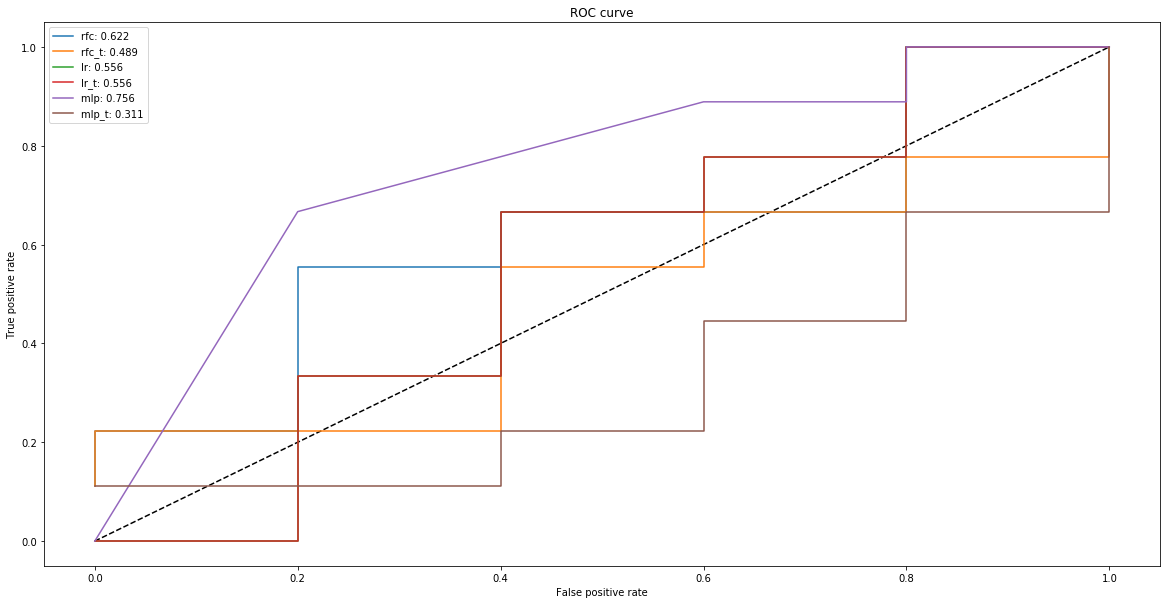

{'max_features': 0.9, 'min_samples_leaf': 27}
{'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


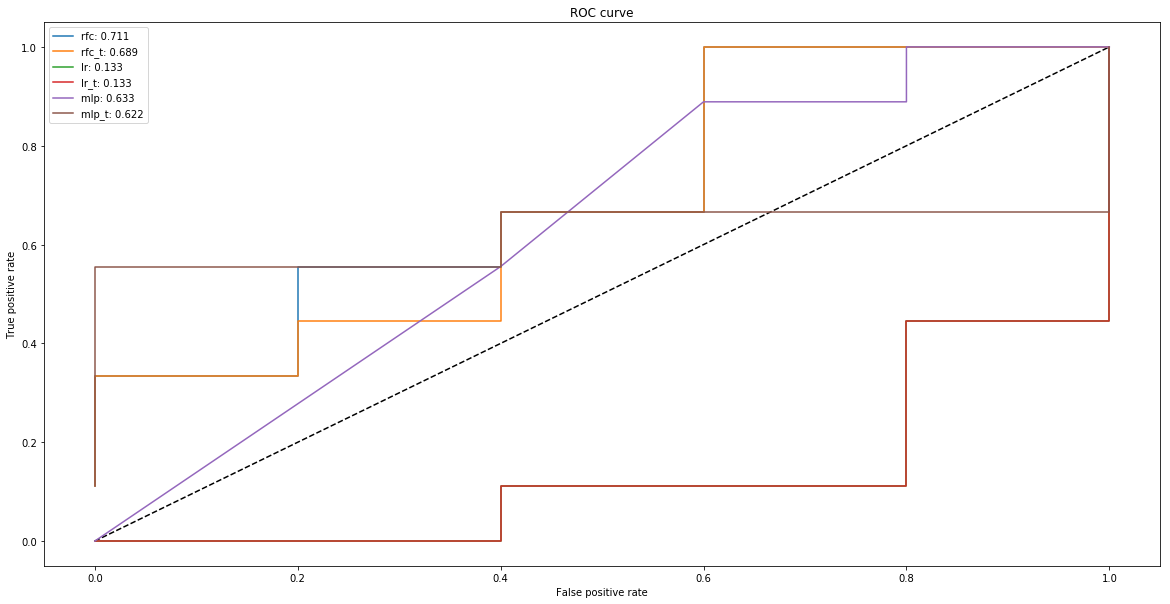

{'max_features': 0.8, 'min_samples_leaf': 17}
{'activation': 'relu', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


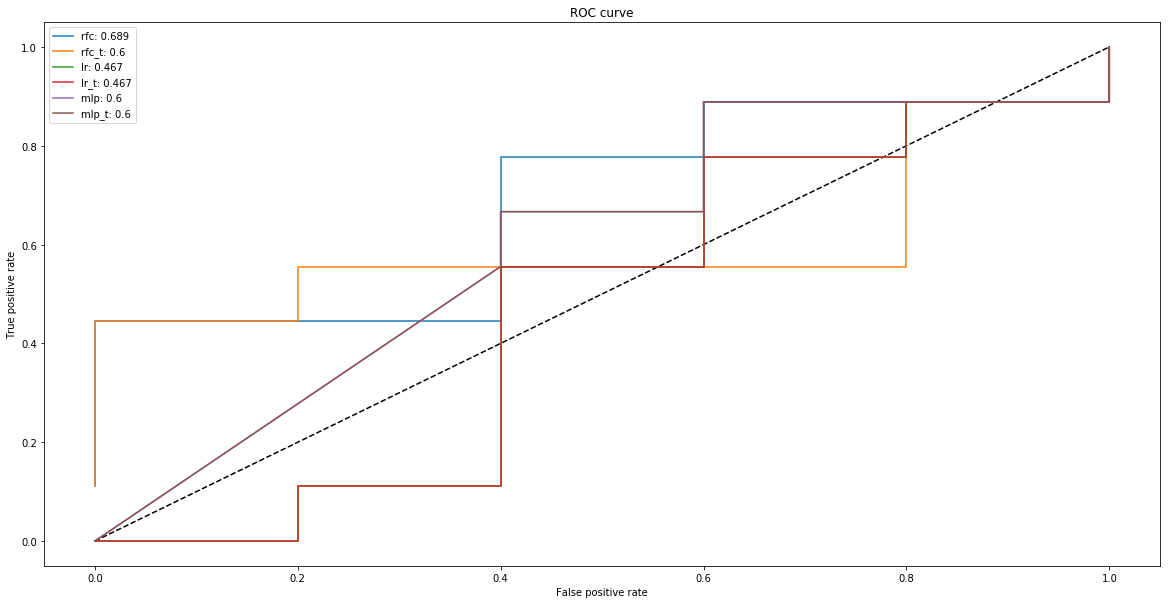

{'max_features': 0.8, 'min_samples_leaf': 31}
{'activation': 'relu', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


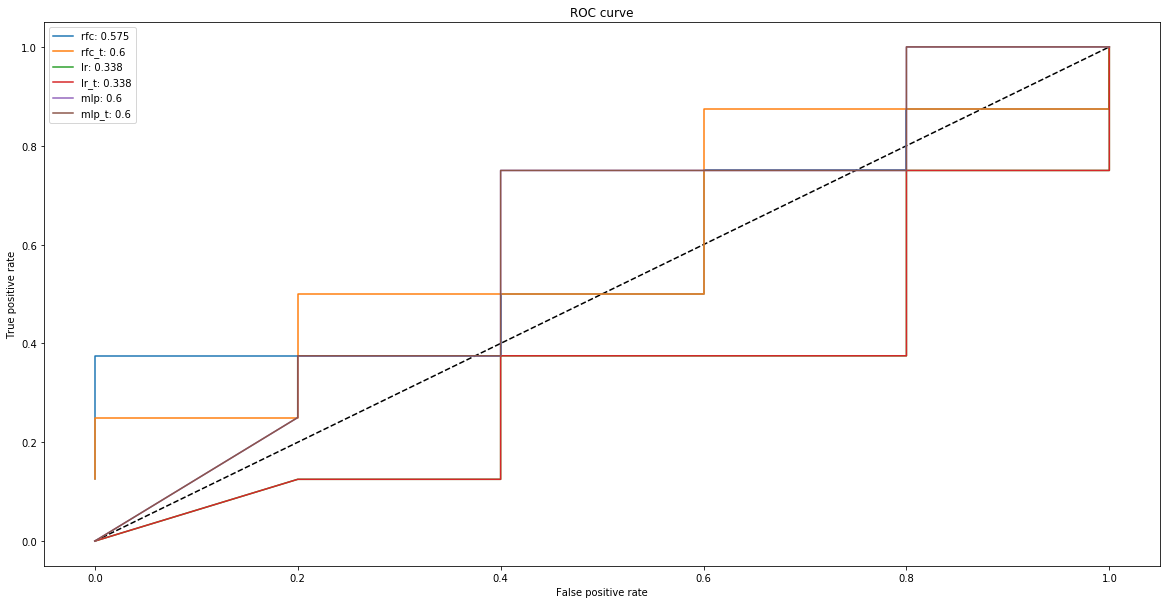

{'max_features': 0.6, 'min_samples_leaf': 27}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


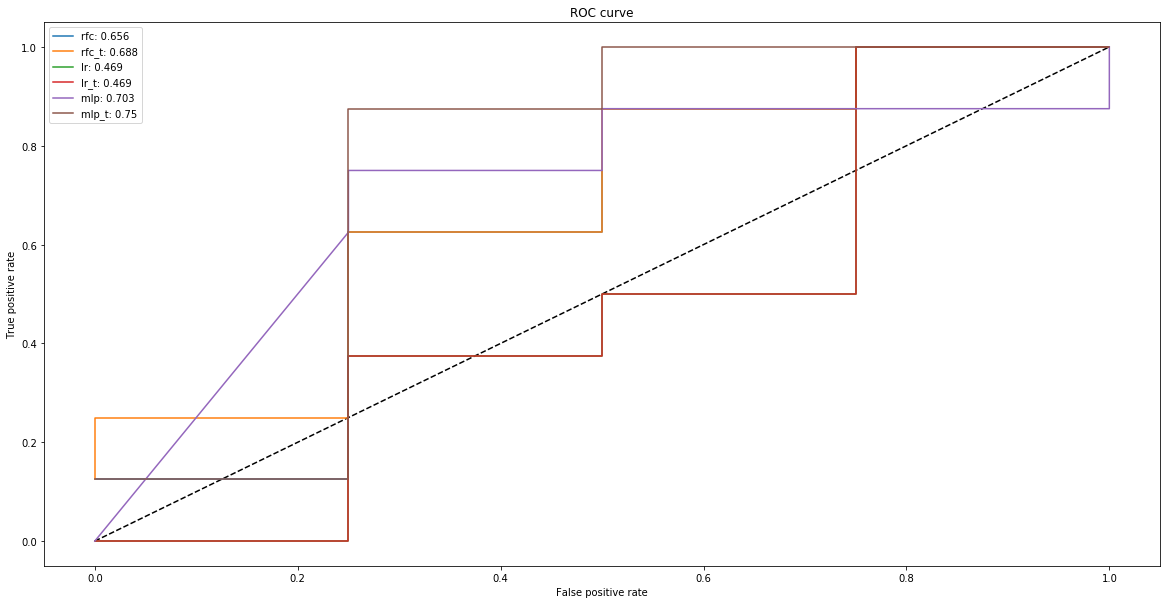

{'max_features': 0.30000000000000004, 'min_samples_leaf': 15}
{'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


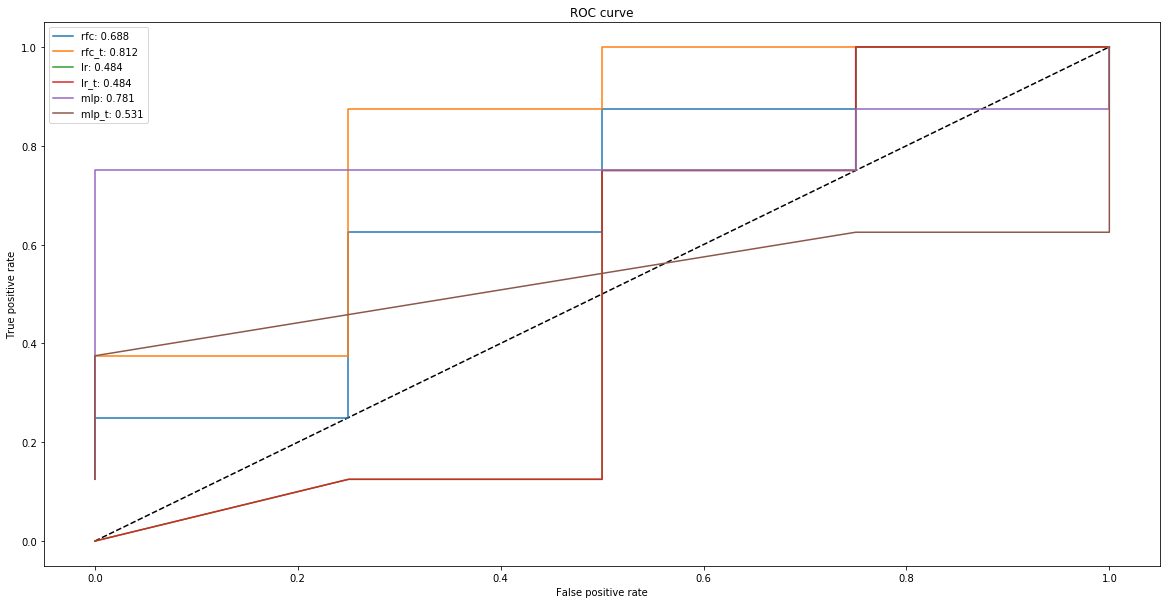

{'max_features': 0.9, 'min_samples_leaf': 25}
{'activation': 'logistic', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


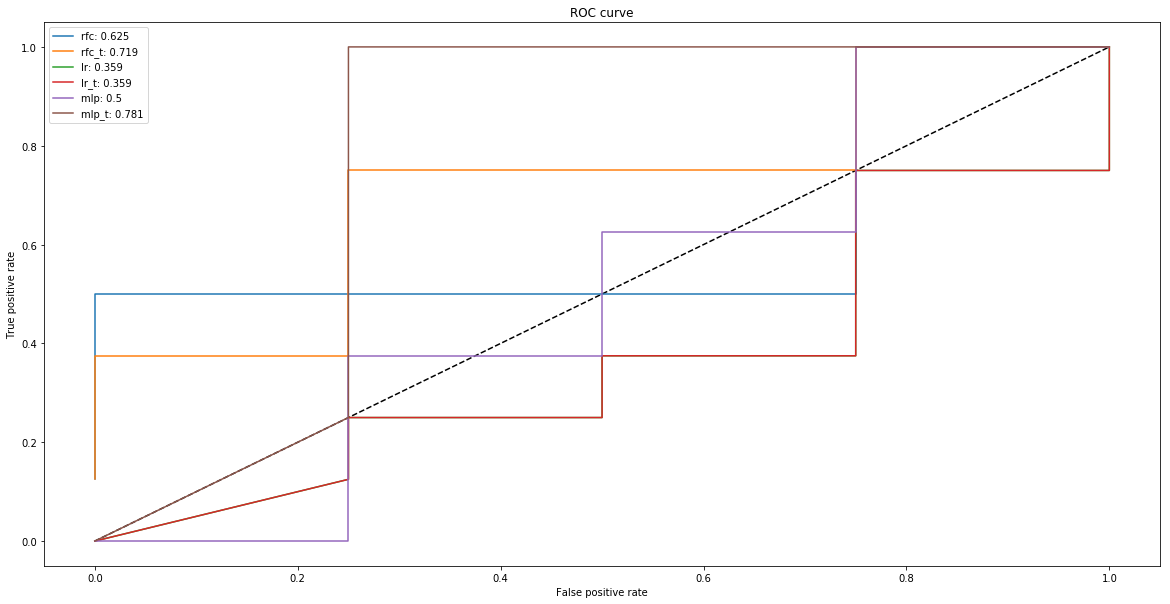

{'max_features': 0.30000000000000004, 'min_samples_leaf': 15}
{'activation': 'relu', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


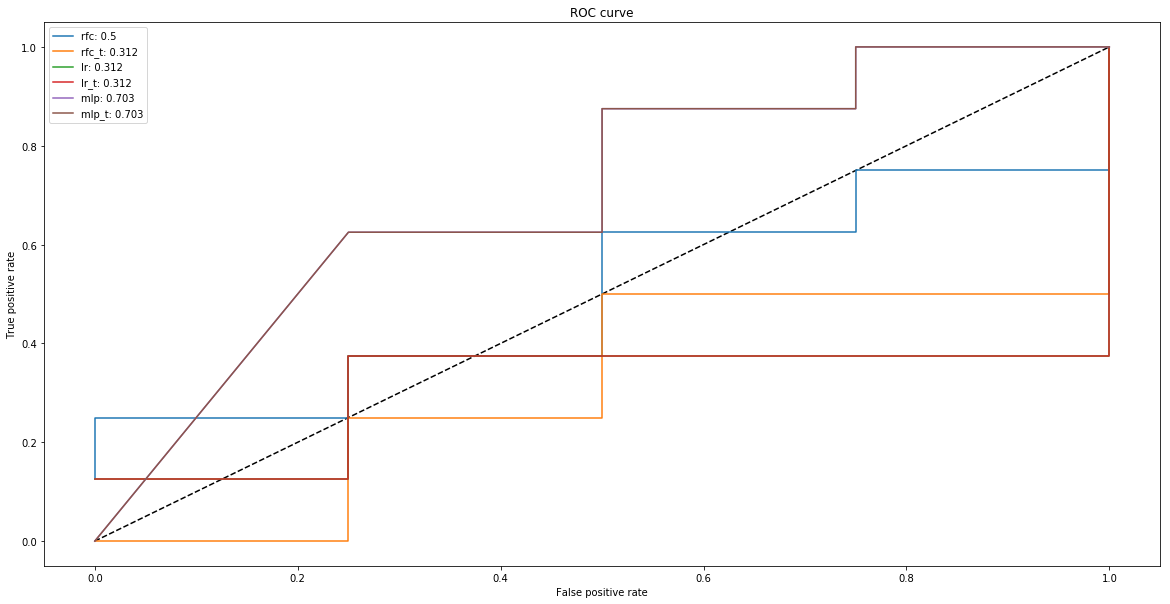

In [7]:
feat1_results = run_models(featArr_clust, tss_label)

In [8]:
fold_titles = ['Fold %d' % n for n in np.arange(1, 10+1, 1)]

f_roc_auc = [feat1_results[r]['roc_auc'] for r in feat1_results]
roc_df = pd.DataFrame(f_roc_auc, index = fold_titles).transpose()

roc_df['mean'] = roc_df.mean(axis = 1)
roc_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,mean
lr,0.666667,0.555556,0.555556,0.133333,0.466667,0.3375,0.468750,0.484375,0.359375,0.312500,0.434028
lr_t,0.666667,0.555556,0.555556,0.133333,0.466667,0.3375,0.468750,0.484375,0.359375,0.312500,0.434028
mlp,0.444444,0.422222,0.755556,0.633333,0.600000,0.6000,0.703125,0.781250,0.500000,0.703125,0.614306
mlp_t,0.400000,0.622222,0.311111,0.622222,0.600000,0.6000,0.750000,0.531250,0.781250,0.703125,0.592118
rfc,0.311111,0.555556,0.622222,0.711111,0.688889,0.5750,0.656250,0.687500,0.625000,0.500000,0.593264
rfc_t,0.288889,0.511111,0.488889,0.688889,0.600000,0.6000,0.687500,0.812500,0.718750,0.312500,0.570903


rfc
rfc_t
lr
lr_t
mlp
mlp_t


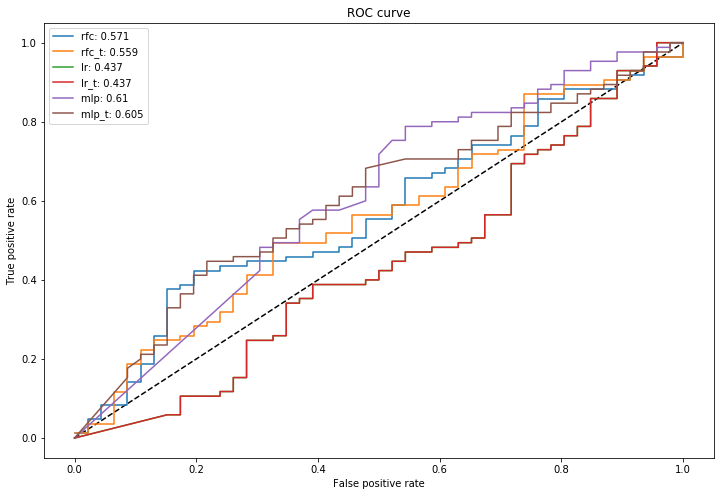

In [9]:
results = {}
probabilities = {}
fpr = {}
tpr = {}
roc_auc = {}
metrics = {}
plt.figure(1)
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')

f_labs = np.concatenate([feat1_results[i]['labels'] for i in feat1_results])
f_prob = [feat1_results[r]['probabilities'] for r in feat1_results] 


probabilities = []
for i in f_prob[0]:
    print(i)
    probs = np.concatenate([f_prob[j][i] for j in np.arange(0,len(f_prob), 1)])
    probabilities.append(probs)
    fpr[i], tpr[i], _ = roc_curve(f_labs, probs)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label = str(i) + ': ' + str(round(roc_auc[i], 3)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Non Cluster Results

In [10]:
#generate the non-clustered features - done once and then loaded
#featArr_noclust = generate_features_noncluster(patients, raw_data)
#np.save('features_nocluster.npy', featArr_noclust)
featArr_noclust = np.load('features_nocluster.npy')

{'max_features': 0.8, 'min_samples_leaf': 17}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant'}


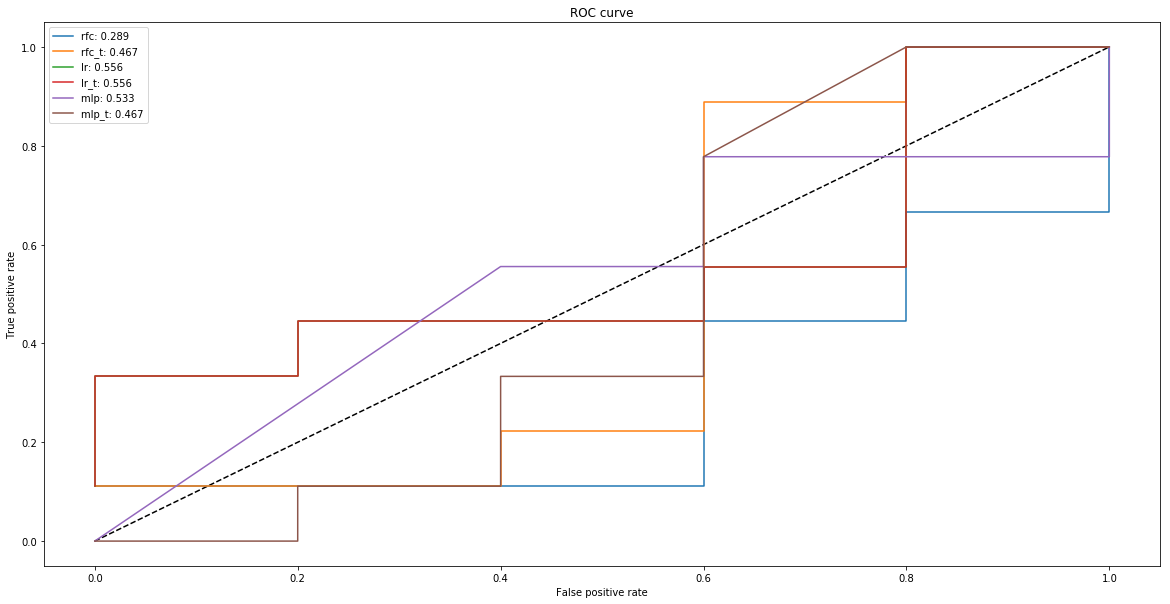

{'max_features': 0.1, 'min_samples_leaf': 15}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


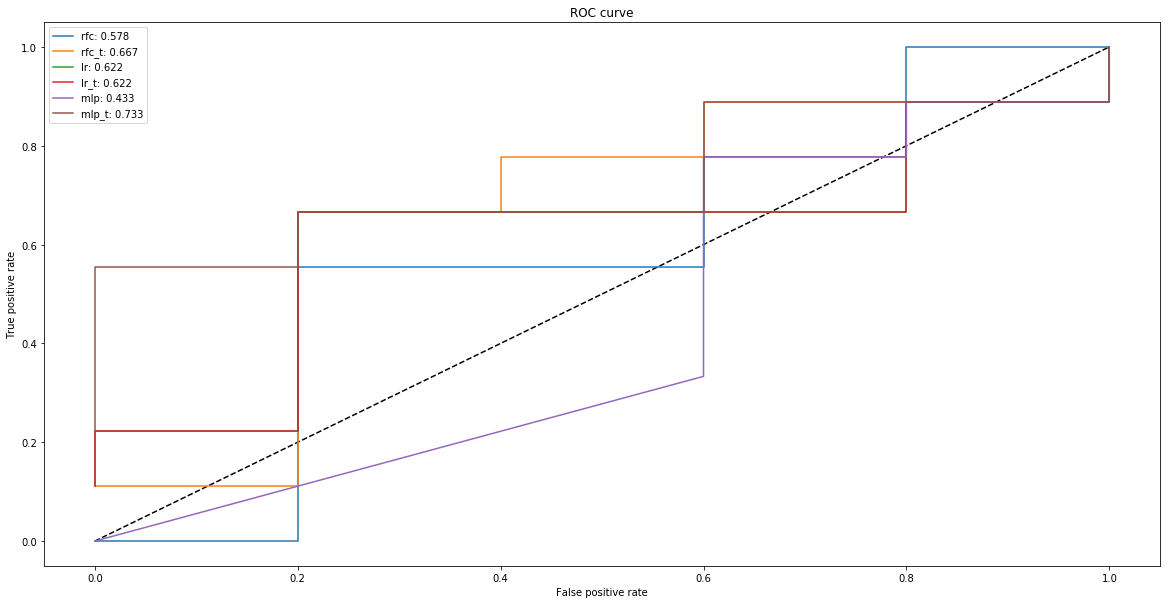

{'max_features': 0.6, 'min_samples_leaf': 17}
{'activation': 'relu', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


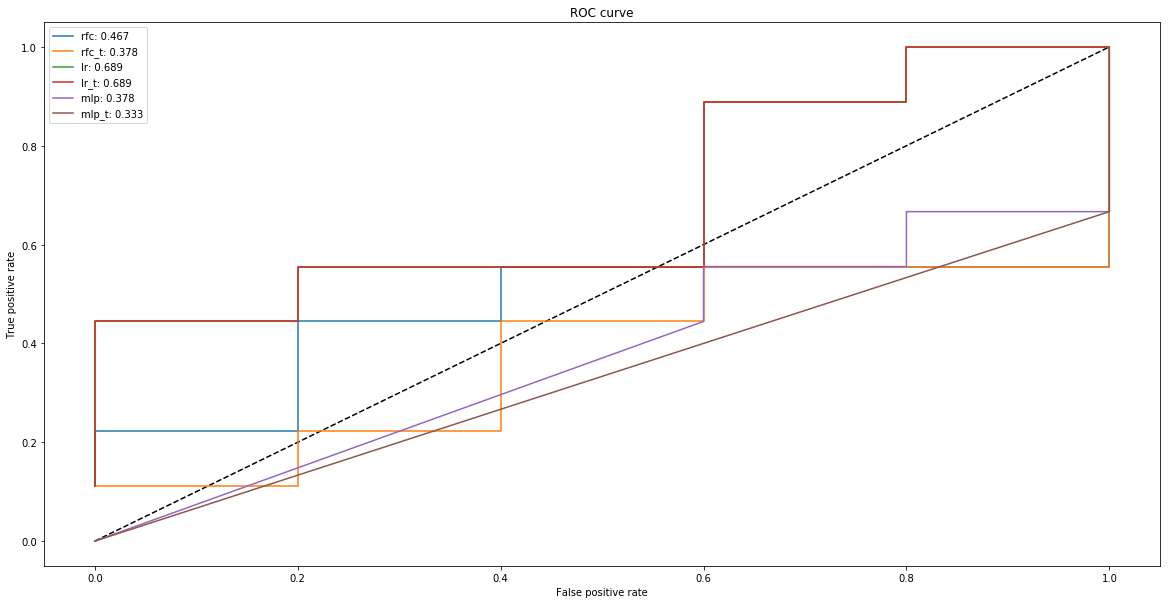

{'max_features': 0.2, 'min_samples_leaf': 17}
{'activation': 'logistic', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


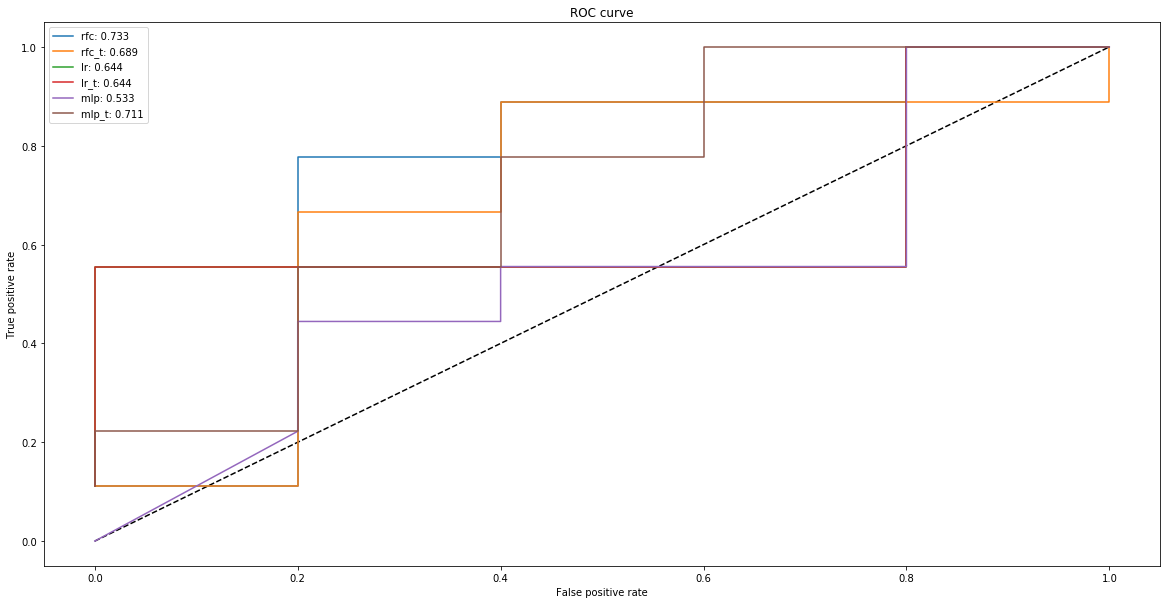

{'max_features': 0.5, 'min_samples_leaf': 33}
{'activation': 'relu', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


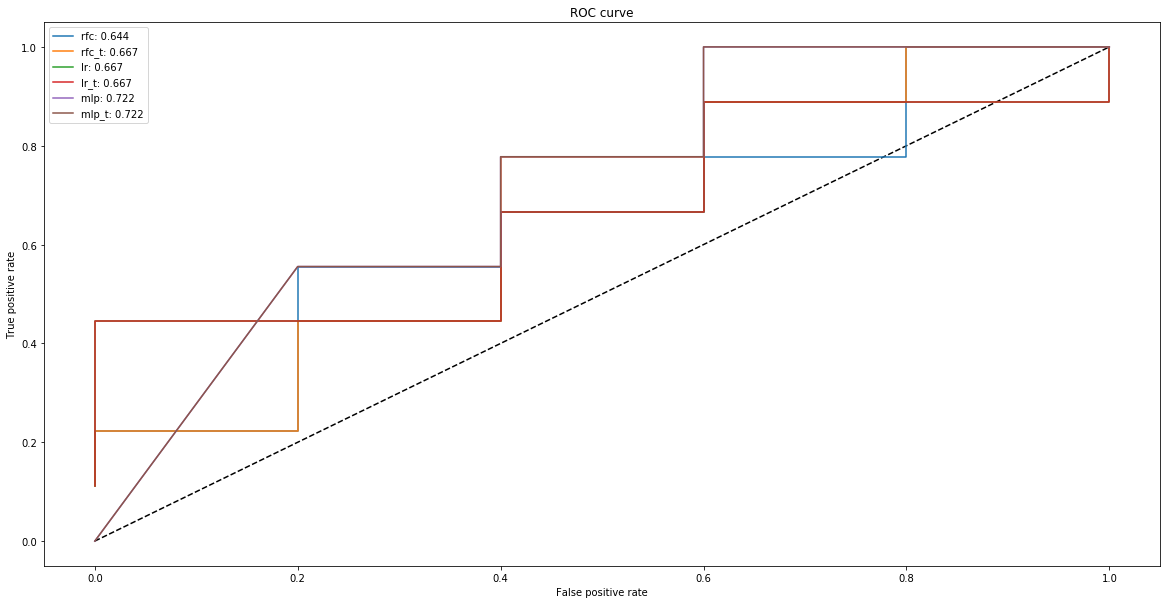

{'max_features': 0.1, 'min_samples_leaf': 17}
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 2), 'learning_rate': 'constant'}


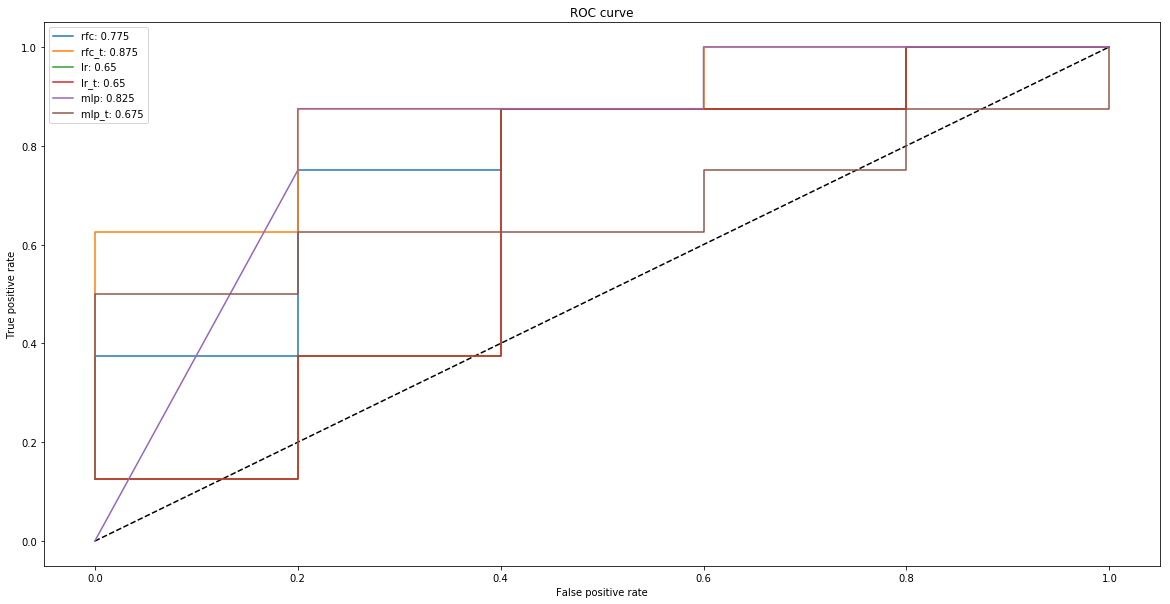

{'max_features': 0.1, 'min_samples_leaf': 33}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


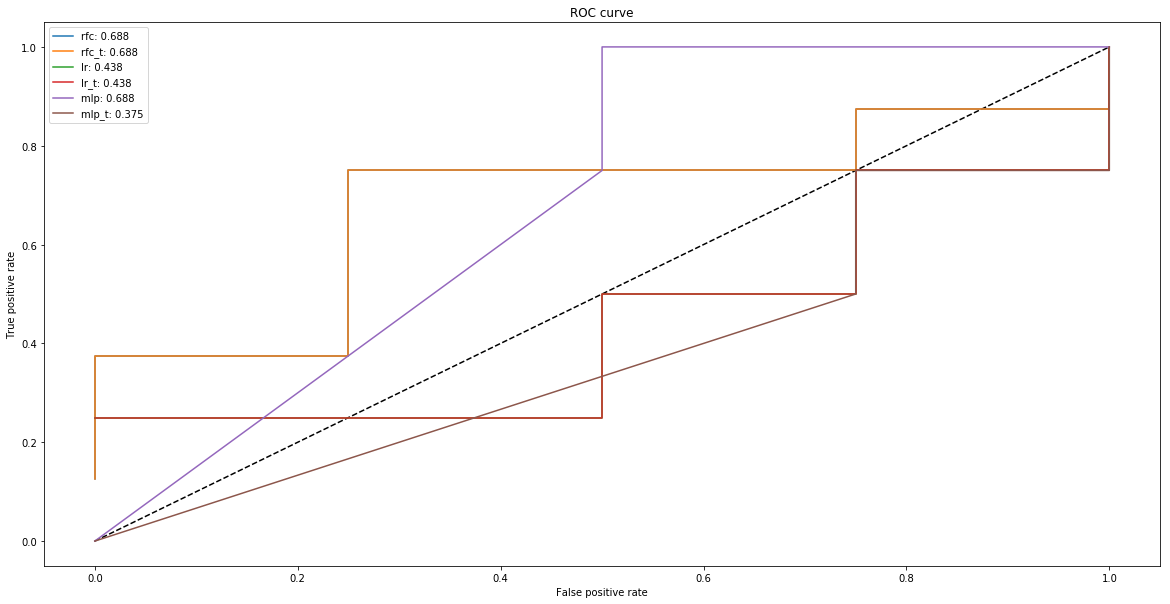

{'max_features': 0.6, 'min_samples_leaf': 33}
{'activation': 'logistic', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


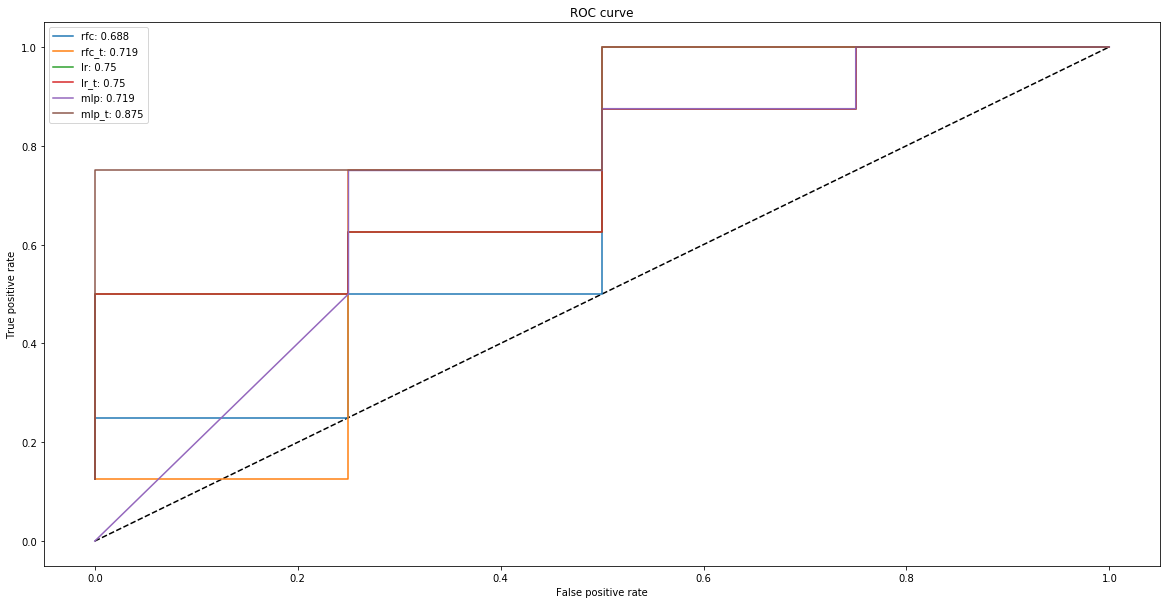

{'max_features': 0.1, 'min_samples_leaf': 17}
{'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


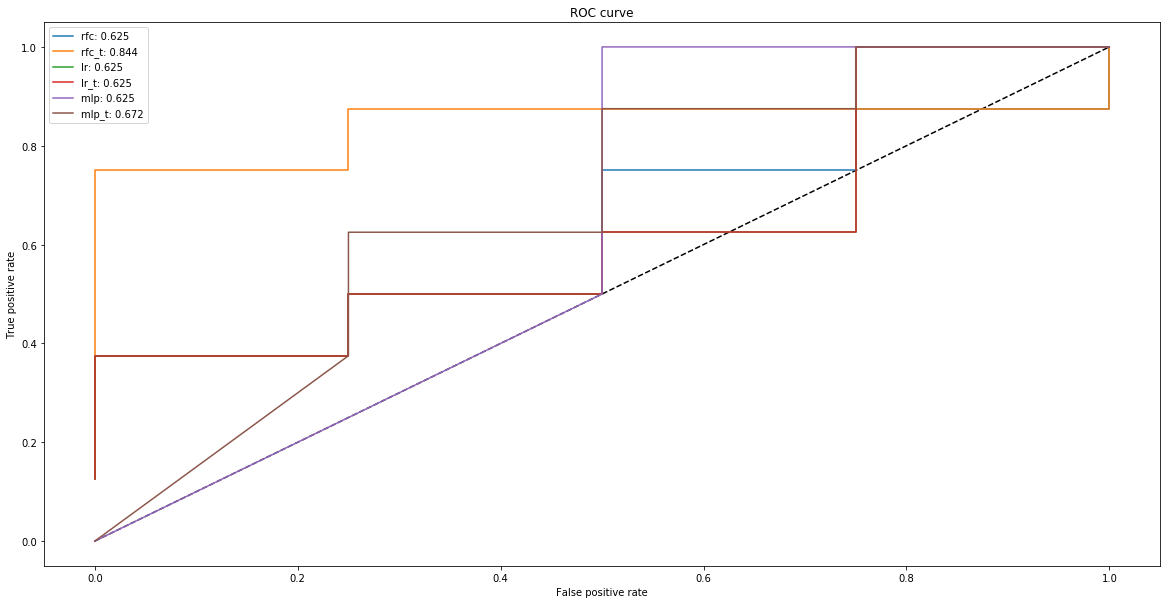

{'max_features': 0.1, 'min_samples_leaf': 15}
{'activation': 'logistic', 'hidden_layer_sizes': (50, 2), 'learning_rate': 'constant'}


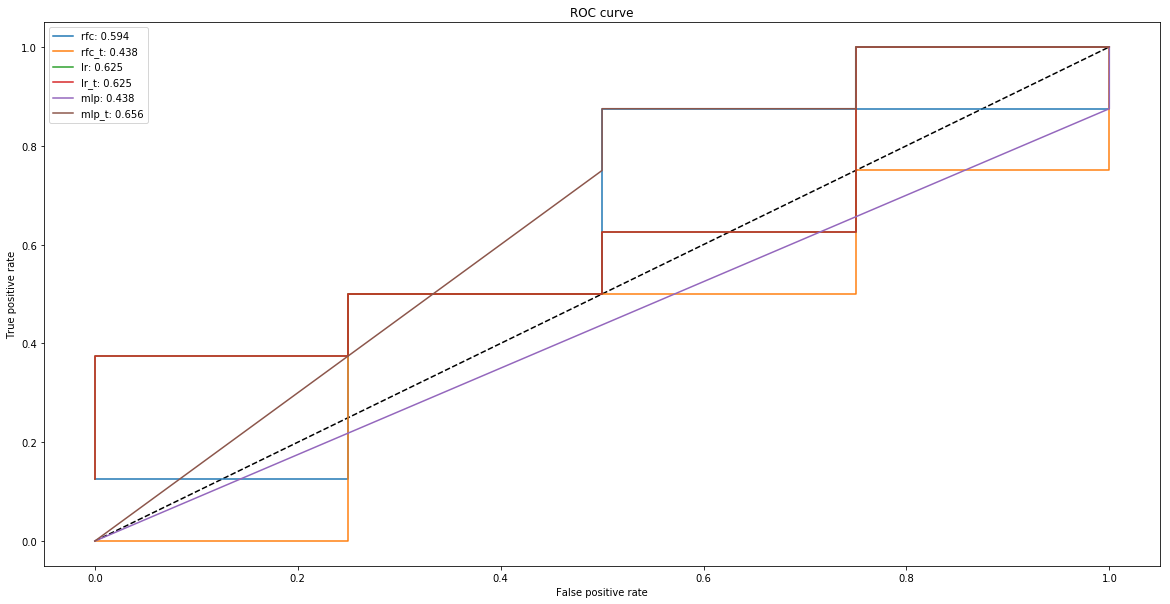

In [11]:
feat2_results = run_models(featArr_noclust, tss_label)

In [12]:
fold_titles = ['Fold %d' % n for n in np.arange(1, 10+1, 1)]

f_roc_auc = [feat2_results[r]['roc_auc'] for r in feat2_results]
roc_df = pd.DataFrame(f_roc_auc, index = fold_titles).transpose()

roc_df['mean'] = roc_df.mean(axis = 1)
roc_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,mean
lr,0.555556,0.622222,0.688889,0.644444,0.666667,0.650,0.4375,0.75000,0.625000,0.62500,0.626528
lr_t,0.555556,0.622222,0.688889,0.644444,0.666667,0.650,0.4375,0.75000,0.625000,0.62500,0.626528
mlp,0.533333,0.433333,0.377778,0.533333,0.722222,0.825,0.6875,0.71875,0.625000,0.43750,0.589375
mlp_t,0.466667,0.733333,0.333333,0.711111,0.722222,0.675,0.3750,0.87500,0.671875,0.65625,0.621979
rfc,0.288889,0.577778,0.466667,0.733333,0.644444,0.775,0.6875,0.68750,0.625000,0.59375,0.607986
rfc_t,0.466667,0.666667,0.377778,0.688889,0.666667,0.875,0.6875,0.71875,0.843750,0.43750,0.642917


rfc
rfc_t
lr
lr_t
mlp
mlp_t


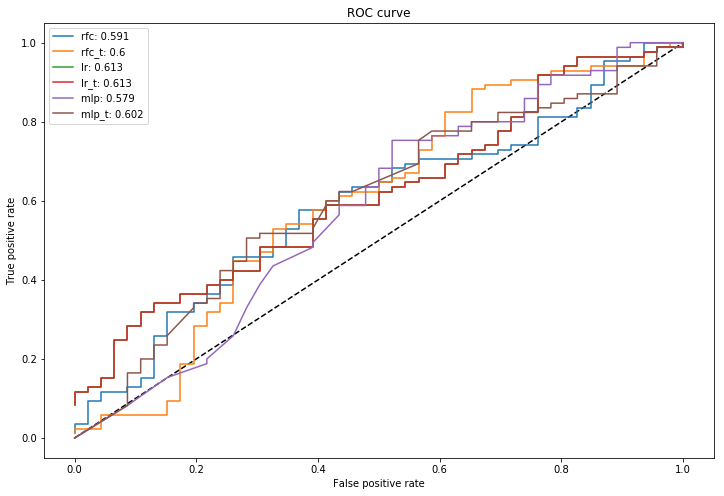

In [13]:
results = {}
probabilities = {}
fpr = {}
tpr = {}
roc_auc = {}
metrics = {}
plt.figure(1)
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')

f_labs = np.concatenate([feat2_results[i]['labels'] for i in feat2_results])
f_prob = [feat2_results[r]['probabilities'] for r in feat2_results] 


probabilities = []
for i in f_prob[0]:
    print(i)
    probs = np.concatenate([f_prob[j][i] for j in np.arange(0,len(f_prob), 1)])
    probabilities.append(probs)
    fpr[i], tpr[i], _ = roc_curve(f_labs, probs)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label = str(i) + ': ' + str(round(roc_auc[i], 3)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()